In [7]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [8]:
data = pd.read_csv('/Users/seyoonlee/Desktop/workspace/midpoject/middata/data_final.csv',encoding='utf-8')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   가구구분코드                        4501 non-null   int64  
 1   가구원수                          4501 non-null   int64  
 2   가구주_관계코드                      4501 non-null   int64  
 3   가구주_성별코드                      4501 non-null   int64  
 4   가구주_연령                        4501 non-null   int64  
 5   가구주_학력코드                      4501 non-null   int64  
 6   가구주_수학구분코드                    4501 non-null   int64  
 7   가구주_취업여부                      4501 non-null   int64  
 8   가구주_7차직업분류코드                  4501 non-null   object 
 9   가구주_종사상지위코드                   4501 non-null   float64
 10  입주형태코드                        4501 non-null   int64  
 11  월세평가금액                        4501 non-null   int64  
 12  전세보증금                         4501 non-null   int64  
 13  월세사

In [11]:
print(data.isnull().sum())

가구구분코드                          0
가구원수                            0
가구주_관계코드                        0
가구주_성별코드                        0
가구주_연령                          0
가구주_학력코드                        0
가구주_수학구분코드                      0
가구주_취업여부                        0
가구주_7차직업분류코드                    0
가구주_종사상지위코드                     0
입주형태코드                          0
월세평가금액                          0
전세보증금                           0
월세사글세                           0
소득구간코드                          0
가계지출금액                          0
가계지출_소비지출금액                     0
가계지출_소비지출_식료품비주류음료구입비           0
가계지출_소비지출_주류담배구입비               0
가계지출_소비지출_의류신발구입비               0
가계지출_소비지출_주거수도광열비               0
가계지출_소비지출_가정용품가사서비스이용금액         0
가계지출_소비지출_보건제품구입비               0
가계지출_소비지출_교통비                   0
가계지출_소비지출_통신비                   0
가계지출_소비지출_오락문화비                 0
가계지출_소비지출_오락문화_영상음향기기구입비        0
가계지출_소비지출_오락문화_사진광학장비구입비        0
가계지출_소비지출_오락문화_정보처리장치구입비        0
가계지출_소비지출_오락문화

In [12]:
display(data.describe())

,가구구분코드,가구원수,가구주_관계코드,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_수학구분코드,가구주_취업여부,가구주_종사상지위코드,입주형태코드,...,가계지출_소비지출_오락문화_기타인쇄물구입비,가계지출_소비지출_오락문화_문구구입비,가계지출_소비지출_오락문화_단체여행경비,가계지출_소비지출_교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_음식숙박_식대,가계지출_소비지출_음식숙박_숙박비,가계지출_소비지출_기타상품서비스이용금액,도시읍면부구분코드,조사연도
count,4501.000000,4501.0,4501.0,4501.000000,4501.000000,4501.000000,4501.000000,4501.0,4501.000000,4501.000000,...,4501.000000,4501.000000,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4501.000000,4501.000000
mean,1.088203,1.0,1.0,1.475894,28.147745,5.597645,1.269496,1.0,1.655410,4.918685,...,728.372806,2314.498334,2.491078e+04,4.451852e+04,4.071825e+05,3.871320e+05,2.005050e+04,1.314090e+05,0.916685,2021.837147
std,0.283621,0.0,0.0,0.499474,3.671171,0.885982,0.749237,0.0,1.344168,1.490581,...,7017.053274,8245.843861,1.190582e+05,1.568537e+05,2.215045e+05,2.039146e+05,5.543499e+04,1.823384e+05,0.276388,1.639758
min,1.000000,1.0,1.0,1.000000,19.000000,2.000000,1.000000,1.0,1.000000,1.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2019.000000
25%,1.000000,1.0,1.0,1.000000,26.000000,5.000000,1.000000,1.0,1.000000,4.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,2.605500e+05,2.500980e+05,0.000000e+00,4.783600e+04,1.000000,2020.000000
50%,1.000000,1.0,1.0,1.000000,28.000000,6.000000,1.000000,1.0,1.000000,6.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,3.679000e+05,3.523500e+05,0.000000e+00,8.936700e+04,1.000000,2022.000000
75%,1.000000,1.0,1.0,2.000000,31.000000,6.000000,1.000000,1.0,2.000000,6.000000,...,0.000000,1750.000000,0.000000e+00,0.000000e+00,5.133520e+05,4.849460e+05,1.800000e+04,1.553740e+05,1.000000,2023.000000
max,2.000000,1.0,1.0,2.000000,34.000000,8.000000,5.000000,1.0,7.000000,7.000000,...,247850.000000,337388.000000,3.000000e+06,2.069000e+06,2.484830e+06,2.434830e+06,1.148933e+06,3.650662e+06,1.000000,2024.000000


In [13]:
columns = list(data.columns)
for col in columns:
    print(col)

가구구분코드
가구원수
가구주_관계코드
가구주_성별코드
가구주_연령
가구주_학력코드
가구주_수학구분코드
가구주_취업여부
가구주_7차직업분류코드
가구주_종사상지위코드
입주형태코드
월세평가금액
전세보증금
월세사글세
소득구간코드
가계지출금액
가계지출_소비지출금액
가계지출_소비지출_식료품비주류음료구입비
가계지출_소비지출_주류담배구입비
가계지출_소비지출_의류신발구입비
가계지출_소비지출_주거수도광열비
가계지출_소비지출_가정용품가사서비스이용금액
가계지출_소비지출_보건제품구입비
가계지출_소비지출_교통비
가계지출_소비지출_통신비
가계지출_소비지출_오락문화비
가계지출_소비지출_오락문화_영상음향기기구입비
가계지출_소비지출_오락문화_사진광학장비구입비
가계지출_소비지출_오락문화_정보처리장치구입비
가계지출_소비지출_오락문화_기록매체구입비
가계지출_소비지출_오락문화_영상음향정보기기수리비
가계지출_소비지출_오락문화_내구재구입비
가계지출_소비지출_오락문화_악기기구구입비
가계지출_소비지출_오락문화_오락문화내구재유지수리비
가계지출_소비지출_오락문화_장난감취미용품구입비
가계지출_소비지출_오락문화_캠핑운동관련용품구입비
가계지출_소비지출_오락문화_화훼관련용품구입비
가계지출_소비지출_오락문화_애완동물관련물품구입비
가계지출_소비지출_오락문화_화훼애완동물서비스이용금액
가계지출_소비지출_오락문화_운동오락서비스이용금액
가계지출_소비지출_오락문화_문화서비스이용금액
가계지출_소비지출_오락문화_복권구입비
가계지출_소비지출_오락문화_서적구입비
가계지출_소비지출_오락문화_기타인쇄물구입비
가계지출_소비지출_오락문화_문구구입비
가계지출_소비지출_오락문화_단체여행경비
가계지출_소비지출_교육비
가계지출_소비지출_음식숙박비
가계지출_소비지출_음식숙박_식대
가계지출_소비지출_음식숙박_숙박비
가계지출_소비지출_기타상품서비스이용금액
도시읍면부구분코드
조사연도


In [14]:
selected_columns = [
    '가구구분코드','가구원수','가구주_성별코드','가구주_연령','가구주_학력코드',
    '가구주_취업여부','가구주_7차직업분류코드','가구주_종사상지위코드',
    '소득구간코드','가계지출금액','가계지출_소비지출금액',
    '가계지출_소비지출_식료품비주류음료구입비','가계지출_소비지출_주거수도광열비','가계지출_소비지출_보건제품구입비','가계지출_소비지출_교통비','가계지출_소비지출_통신비',
    '가계지출_소비지출_주류담배구입비','가계지출_소비지출_의류신발구입비','가계지출_소비지출_가정용품가사서비스이용금액','가계지출_소비지출_오락문화비',
    '가계지출_소비지출_교육비','가계지출_소비지출_음식숙박비','가계지출_소비지출_기타상품서비스이용금액','조사연도'
]

data2 = data[selected_columns].copy()
print(data2.head)

<bound method NDFrame.head of       가구구분코드  가구원수  가구주_성별코드  가구주_연령  가구주_학력코드  가구주_취업여부 가구주_7차직업분류코드  \
0          1     1         1      31         4         1            3   
1          1     1         1      34         5         1            3   
2          1     1         1      34         6         1            3   
3          1     1         1      34         6         1            9   
4          1     1         1      19         4         1            3   
...      ...   ...       ...     ...       ...       ...          ...   
4496       2     1         1      28         6         1            4   
4497       1     1         2      33         4         1            7   
4498       1     1         2      20         6         1            4   
4499       1     1         2      28         5         1            3   
4500       1     1         2      30         7         1            2   

      가구주_종사상지위코드  소득구간코드   가계지출금액  ...  가계지출_소비지출_교통비  가계지출_소비지출_통신비  \
0             1.0   

In [15]:
data2.describe()

,가구구분코드,가구원수,가구주_성별코드,가구주_연령,가구주_학력코드,가구주_취업여부,가구주_종사상지위코드,소득구간코드,가계지출금액,가계지출_소비지출금액,...,가계지출_소비지출_교통비,가계지출_소비지출_통신비,가계지출_소비지출_주류담배구입비,가계지출_소비지출_의류신발구입비,가계지출_소비지출_가정용품가사서비스이용금액,가계지출_소비지출_오락문화비,가계지출_소비지출_교육비,가계지출_소비지출_음식숙박비,가계지출_소비지출_기타상품서비스이용금액,조사연도
count,4501.000000,4501.0,4501.000000,4501.000000,4501.000000,4501.0,4501.000000,4501.000000,4.501000e+03,4.501000e+03,...,4.501000e+03,4.501000e+03,4501.000000,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4.501000e+03,4501.000000
mean,1.088203,1.0,1.475894,28.147745,5.597645,1.0,1.655410,3.646523,2.365787e+06,1.811848e+06,...,2.344091e+05,8.278823e+04,33268.307043,1.191093e+05,7.157710e+04,1.646789e+05,4.451852e+04,4.071825e+05,1.314090e+05,2021.837147
std,0.283621,0.0,0.499474,3.671171,0.885982,0.0,1.344168,1.469287,1.516345e+06,1.282799e+06,...,9.237269e+05,1.012418e+05,49377.203086,1.530277e+05,3.169101e+05,2.401613e+05,1.568537e+05,2.215045e+05,1.823384e+05,1.639758
min,1.000000,1.0,1.000000,19.000000,2.000000,1.0,1.000000,1.000000,3.347460e+05,3.087720e+05,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2019.000000
25%,1.000000,1.0,1.000000,26.000000,5.000000,1.0,1.000000,3.000000,1.583713e+06,1.227333e+06,...,7.653300e+04,4.466300e+04,700.000000,2.781100e+04,6.902000e+03,4.185000e+04,0.000000e+00,2.605500e+05,4.783600e+04,2020.000000
50%,1.000000,1.0,1.000000,28.000000,6.000000,1.0,1.000000,3.000000,2.096728e+06,1.599957e+06,...,1.307640e+05,6.318400e+04,11000.000000,7.654200e+04,2.055000e+04,9.303200e+04,0.000000e+00,3.679000e+05,8.936700e+04,2022.000000
75%,1.000000,1.0,2.000000,31.000000,6.000000,1.0,2.000000,4.000000,2.777694e+06,2.080075e+06,...,2.179830e+05,8.511100e+04,46538.000000,1.557370e+05,5.201100e+04,1.930660e+05,0.000000e+00,5.133520e+05,1.553740e+05,2023.000000
max,2.000000,1.0,2.000000,34.000000,8.000000,1.0,7.000000,8.000000,4.174407e+07,3.953890e+07,...,3.726910e+07,1.635750e+06,715000.000000,3.054966e+06,7.781435e+06,4.514508e+06,2.069000e+06,2.484830e+06,3.650662e+06,2024.000000


In [16]:
data2.columns

Index(['가구구분코드', '가구원수', '가구주_성별코드', '가구주_연령', '가구주_학력코드', '가구주_취업여부',
       '가구주_7차직업분류코드', '가구주_종사상지위코드', '소득구간코드', '가계지출금액', '가계지출_소비지출금액',
       '가계지출_소비지출_식료품비주류음료구입비', '가계지출_소비지출_주거수도광열비', '가계지출_소비지출_보건제품구입비',
       '가계지출_소비지출_교통비', '가계지출_소비지출_통신비', '가계지출_소비지출_주류담배구입비',
       '가계지출_소비지출_의류신발구입비', '가계지출_소비지출_가정용품가사서비스이용금액', '가계지출_소비지출_오락문화비',
       '가계지출_소비지출_교육비', '가계지출_소비지출_음식숙박비', '가계지출_소비지출_기타상품서비스이용금액', '조사연도'],
      dtype='object')

In [17]:
data2.rename(columns={
    '가구주_성별코드': '성별',
    '가구주_연령': '연령',
    '가구주_학력코드': '학력',
    '가구주_취업여부': '취엽어부',
    '가구주_7차직업분류코드': '직업',
    '가구주_종사상지위코드': '종사상지위',
    '소득구간코드': '소득구간',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품비주류음료구입비',
    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_보건제품구입비': '보건제품구입비',
    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_주류담배구입비': '주류담배구입비',
    '가계지출_소비지출_의류신발구입비': '의류신발구입비',
    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용금액',
    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_기타상품서비스이용금액': '기타상품서비스이용금액'
}, inplace=True)

data2.head()

,가구구분코드,가구원수,성별,연령,학력,취엽어부,직업,종사상지위,소득구간,가계지출금액,...,교통비,통신비,주류담배구입비,의류신발구입비,가정용품가사서비스이용금액,오락문화비,교육비,음식숙박비,기타상품서비스이용금액,조사연도
0,1,1,1,31,4,1,3,1.0,4,4968138,...,100000,46114,59500,263600,499910,142916,0,279000,525719,2019
1,1,1,1,34,5,1,3,1.0,5,4487267,...,319075,88250,146750,0,130000,138682,0,597385,7500,2019
2,1,1,1,34,6,1,3,1.0,6,6129518,...,111833,0,6320,17300,17267,38293,0,96133,71481,2019
3,1,1,1,34,6,1,9,1.0,5,2721557,...,162333,49430,2267,0,3833,14210,0,435500,71914,2019
4,1,1,1,19,4,1,3,1.0,3,2665048,...,126355,52069,9625,22200,395000,60333,0,458255,66378,2019


변수설명
 - 성별: 1 남자 2 여자
 - 학력: 1 무학 2 초등학교 3 중학교 4 고등학교 5 대학교(3년제 이상) 6 대학교(4년제 이상) 7 대학원(석사) 8 대학원(박사)
 - 종사상지위: 1 상용근로자 2 임시근로자 3 일용근로자 4 고용원이 있는 자영업자 5 고용원이 없는 자영업자 6 무급가족종사자 7 기타종사자
 - 직업: 1 관리자 2 전문가 및 관련 종사자 3 사무 종사자 4 서비스 종사자 5 판매 종사자 6 농립어업숙련종사자 7 기능원 및 관련 기능 종사자 8 장치, 기계조작 및 조립 종사자 9 단순노무 종사자 A 직업군인 Z 기타, 무직
 - 직업군: 1 전문가(1+2) 2 사무직(3) 3 서비스 및 판매 종사자 (4+5) 4 육체노동자 (6:9)
 - 소득: 1 100만원 미만 2 100:200만원 미만 3 200:300만원 미만 4 300:400만원 미만 5 400:500만원 미만 6 500:600만원 미만 7 600:700만원 미만 8 700만원 이상
 - 소득군: 1 최저시급 이하(1+2), 2 200:300만원 미만 3 300:400만원 미만 4 400만원 이상

변수 재정의
 - 성별, 학력, 직업, 종사상지위, 소득은 범주형 변수로 정의함.
 - 직업은 군인/무직은 삭제
 - 연령그룹 만들기: 19-24 대학생, 25-29 사회초년생, 30-34
 - 직업군: 1 전문가(1+2) 2 사무직(3) 3 서비스 및 판매 종사자 (4+5) 4 육체노동자 (6:9)
 - 소득군: 1 최저시급 이하(1+2), 2 200:300만원 미만 3 300:400만원 미만 4 400만원 이상

In [18]:
data2.dtypes

가구구분코드             int64
가구원수               int64
성별                 int64
연령                 int64
학력                 int64
취엽어부               int64
직업                object
종사상지위            float64
소득구간               int64
가계지출금액             int64
가계지출_소비지출금액        int64
식료품비주류음료구입비        int64
주거수도광열비            int64
보건제품구입비            int64
교통비                int64
통신비                int64
주류담배구입비            int64
의류신발구입비            int64
가정용품가사서비스이용금액      int64
오락문화비              int64
교육비                int64
음식숙박비              int64
기타상품서비스이용금액        int64
조사연도               int64
dtype: object

In [19]:
# 성별, 학력, 직업, 종사상지위, 소득 변수를 범주형 변수로 지정
data2['성별'] = data2['성별'].astype('category')
data2['학력'] = data2['학력'].astype('category')
data2['직업'] = data2['직업'].astype('category')
data2['종사상지위'] = data2['종사상지위'].astype('category')
data2['소득구간'] = data2['소득구간'].astype('category')

data2.dtypes
#young2.info()

가구구분코드              int64
가구원수                int64
성별               category
연령                  int64
학력               category
취엽어부                int64
직업               category
종사상지위            category
소득구간             category
가계지출금액              int64
가계지출_소비지출금액         int64
식료품비주류음료구입비         int64
주거수도광열비             int64
보건제품구입비             int64
교통비                 int64
통신비                 int64
주류담배구입비             int64
의류신발구입비             int64
가정용품가사서비스이용금액       int64
오락문화비               int64
교육비                 int64
음식숙박비               int64
기타상품서비스이용금액         int64
조사연도                int64
dtype: object

In [20]:
# A 직업군인과 Z 무직 기타는 제외
data2 = data2[(data2['직업'] != 'A') & (data2['직업'] != 'Z')]
data2['직업'] = data2['직업'].cat.remove_unused_categories()

data2['직업'].value_counts()

2    1624
3    1212
4     561
5     344
8     282
7     232
9     221
1       8
6       7
Name: 직업, dtype: int64

In [21]:
# 연령을 그룹화하기
def 연령그룹화(연령):
    if 19 <= 연령 <= 24:
        return '대학생'
    elif 25 <= 연령 <= 29:
        return '사회초년생'
    elif 30 <= 연령 <= 34:
        return '30대 초반'
    else:
        return '기타'

# 연령그룹 변수 생성
data2['연령그룹'] = data2['연령'].apply(연령그룹화)
data2['연령그룹'].value_counts()
data2['연령'].isnull().sum()

0

In [22]:
# 직업군 그룹화 함수
def 직업그룹화(직업):
    if 직업 in ['1', '2']:
        return '전문가'
    elif 직업 == '3':
        return '사무직'
    elif 직업 in ['4', '5']:
        return '서비스/판매'
    elif 직업 in ['6', '7', '8', '9']:
        return '육체노동자'
    else:
        return '기타'

# 새로운 변수 생성
data2['직업군'] = data2['직업'].apply(직업그룹화).astype('category')

# 결과 확인
print(data2['직업군'].value_counts())

전문가       1632
사무직       1212
서비스/판매     905
육체노동자      742
Name: 직업군, dtype: int64


In [23]:
display(data2['소득구간'])
print(data2['소득구간'].dtype)

0       4
1       5
2       6
3       5
4       3
       ..
4496    4
4497    5
4498    2
4499    3
4500    3
Name: 소득구간, Length: 4491, dtype: category
Categories (8, int64): [1, 2, 3, 4, 5, 6, 7, 8]

category


In [24]:
# 소득군 그룹화 함수 (정수형 기준)
def 소득그룹화(소득구간):
    if 소득구간 in [1, 2]:
        return '최저시급 이하'
    elif 소득구간 == 3:
        return '200-300만원 미만'
    elif 소득구간 == 4:
        return '300-400만원 미만'
    elif 소득구간 in [5, 6, 7, 8]:
        return '400만원 이상'
    else:
        return '기타'

# 새로운 변수 생성
data2['소득군'] = data2['소득구간'].apply(소득그룹화).astype('category')

# 결과 확인
print(data2['소득군'].value_counts(dropna=False))

200-300만원 미만    1435
300-400만원 미만    1120
400만원 이상        1047
최저시급 이하          889
Name: 소득군, dtype: int64


In [25]:
data2.isnull().sum()

가구구분코드           0
가구원수             0
성별               0
연령               0
학력               0
취엽어부             0
직업               0
종사상지위            0
소득구간             0
가계지출금액           0
가계지출_소비지출금액      0
식료품비주류음료구입비      0
주거수도광열비          0
보건제품구입비          0
교통비              0
통신비              0
주류담배구입비          0
의류신발구입비          0
가정용품가사서비스이용금액    0
오락문화비            0
교육비              0
음식숙박비            0
기타상품서비스이용금액      0
조사연도             0
연령그룹             0
직업군              0
소득군              0
dtype: int64

필수지출항목과 비필수지출항목 구분

In [26]:
# 필수/비필수 소비항목 리스트
total_col = '가계지출_소비지출금액'

essential_cols = ['가계지출_소비지출_식료품비주류음료구입비','가계지출_소비지출_주거수도광열비','가계지출_소비지출_보건제품구입비','가계지출_소비지출_교통비','가계지출_소비지출_통신비']

nonessential_cols = ['가계지출_소비지출_주류담배구입비','가계지출_소비지출_의류신발구입비','가계지출_소비지출_가정용품가사서비스이용금액','가계지출_소비지출_오락문화비','가계지출_소비지출_교육비','가계지출_소비지출_음식숙박비','가계지출_소비지출_기타상품서비스이용금액']

In [27]:
# 각 그룹의 총합 구하기
data2['필수소비_총액'] = data[essential_cols].sum(axis=1)
data2['비필수소비_총액'] = data[nonessential_cols].sum(axis=1)

In [28]:
data2[['조사연도', '필수소비_총액', '비필수소비_총액']].head()

,조사연도,필수소비_총액,비필수소비_총액
0,2019,1075344,1770645
1,2019,725510,1020317
2,2019,347649,246794
3,2019,501577,527724
4,2019,561532,1011791


In [29]:
yearly_sum = data2.groupby('조사연도')[['필수소비_총액', '비필수소비_총액']].sum().reset_index()

# 결과 확인
print(yearly_sum)

   조사연도    필수소비_총액    비필수소비_총액
0  2019  386317882   423125387
1  2020  573993247   600673956
2  2021  547610050   640006459
3  2022  646706832   752072524
4  2023  756915402   944189048
5  2024  861227060  1005136884


# 평균

In [79]:
# 연도별 필수/비필수 소비 평균 계산
yearly_avg = data2.groupby('조사연도')[['필수소비_총액', '비필수소비_총액']].mean().reset_index()

# 보기 좋게 포맷팅 (선택사항)
yearly_avg['필수소비_총액'] = yearly_avg['필수소비_총액'].round(0).astype(int)
yearly_avg['비필수소비_총액'] = yearly_avg['비필수소비_총액'].round(0).astype(int)

# 결과 출력
print(yearly_avg)

   조사연도  필수소비_총액  비필수소비_총액
0  2019   838000    917842
1  2020   841632    880754
2  2021   753246    880339
3  2022   813468    946003
4  2023   835447   1042151
5  2024   936116   1092540


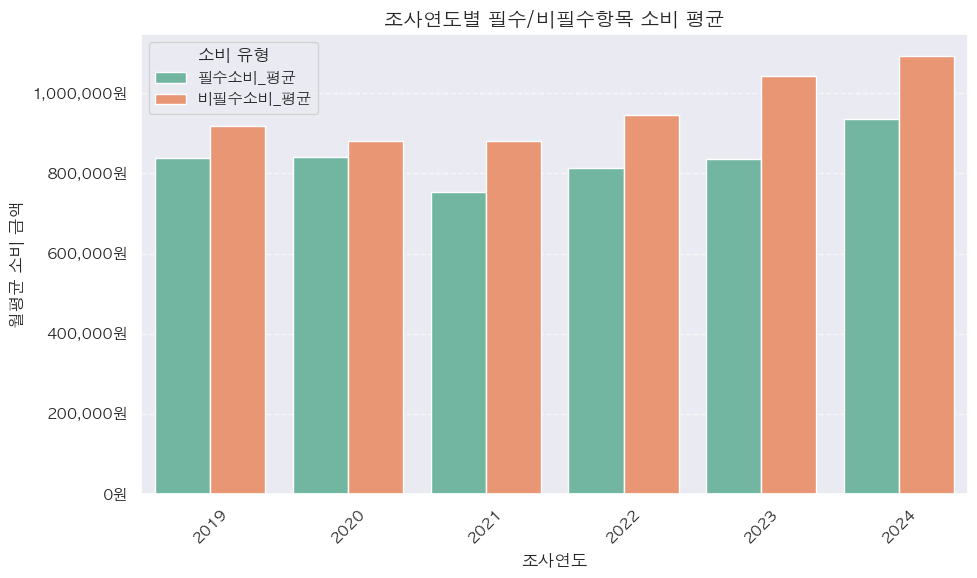

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 예시 데이터프레임
data = pd.DataFrame({
    '조사연도': [2019, 2020, 2021, 2022, 2023, 2024],
    '필수소비_평균': [838000, 841632, 753246, 813468, 835447, 936116],
    '비필수소비_평균': [917842, 880754, 880339, 946003, 1042151, 1092540]
})

# 데이터 재구조화
data_melted = pd.melt(data, id_vars='조사연도', value_vars=['필수소비_평균', '비필수소비_평균'],
                      var_name='소비유형', value_name='금액')

# 원화 포맷터 함수
def format_won(x, pos):
    return f'{int(x):,}원'

won_formatter = FuncFormatter(format_won)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='조사연도', y='금액', hue='소비유형', palette='Set2')

# y축 포맷 적용
plt.gca().yaxis.set_major_formatter(won_formatter)

# 제목과 축 라벨
plt.title('조사연도별 필수/비필수항목 소비 평균', fontsize=14)
plt.xlabel('조사연도')
plt.ylabel('월평균 소비 금액')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='소비 유형')
plt.tight_layout()
plt.show()


# 중앙값

In [162]:
# 연도별 필수/비필수 소비 중앙값 계산
yearly_median = data2.groupby('조사연도')[['필수소비_총액', '비필수소비_총액']].median().reset_index()

# 보기 좋게 포맷팅 (선택사항)
yearly_median['필수소비_총액'] = yearly_median['필수소비_총액'].round(0).astype(int)
yearly_median['비필수소비_총액'] = yearly_median['비필수소비_총액'].round(0).astype(int)

# 결과 출력
print(yearly_median)


   조사연도  필수소비_총액  비필수소비_총액
0  2019   678379    790076
1  2020   699786    728246
2  2021   681145    756400
3  2022   702233    847896
4  2023   746654    895753
5  2024   801372    929696


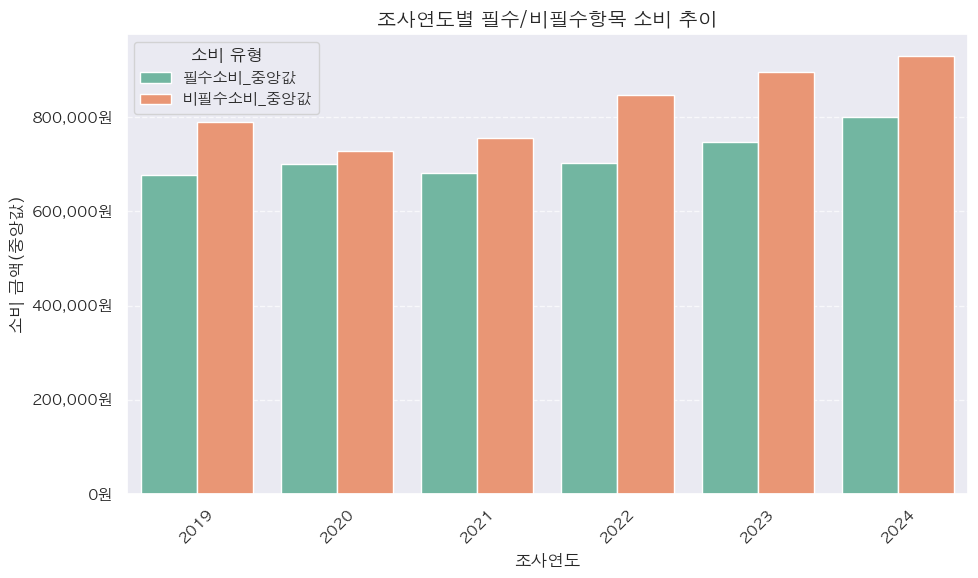

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 예시 데이터프레임
data = pd.DataFrame({
    '조사연도': [2019, 2020, 2021, 2022, 2023, 2024],
    '필수소비_중앙값': [678379, 699786, 681145 , 702233 , 746654 , 801372],
    '비필수소비_중앙값': [790076, 728246, 756400,847896, 895753, 929696]
})

# 데이터 재구조화
data_melted = pd.melt(data, id_vars='조사연도', value_vars=['필수소비_중앙값', '비필수소비_중앙값'],
                      var_name='소비유형', value_name='금액')

# 원화 포맷터 함수
def format_won(x, pos):
    return f'{int(x):,}원'

won_formatter = FuncFormatter(format_won)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='조사연도', y='금액', hue='소비유형', palette='Set2')

# y축 포맷 적용
plt.gca().yaxis.set_major_formatter(won_formatter)

# 제목과 축 라벨
plt.title('조사연도별 필수/비필수항목 소비 추이', fontsize=14)
plt.xlabel('조사연도')
plt.ylabel('소비 금액(중앙값)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='소비 유형')
plt.tight_layout()
plt.show()


In [30]:
# 전체 소비 대비 비중 계산
data2['필수소비_비중'] = data2['필수소비_총액'] / data2[total_col]*100
data2['비필수소비_비중'] = data2['비필수소비_총액'] / data2[total_col]*100

In [31]:
data2[['조사연도', '필수소비_비중', '비필수소비_비중']].head()

,조사연도,필수소비_비중,비필수소비_비중
0,2019,37.784545,62.215455
1,2019,41.556809,58.443191
2,2019,58.482955,41.516709
3,2019,48.729866,51.270134
4,2019,35.690828,64.309172


In [222]:
data2_melted = data2.melt(id_vars='조사연도', value_vars=['필수소비_비중', '비필수소비_비중']
                    ,var_name='소비유형', value_name='비중')

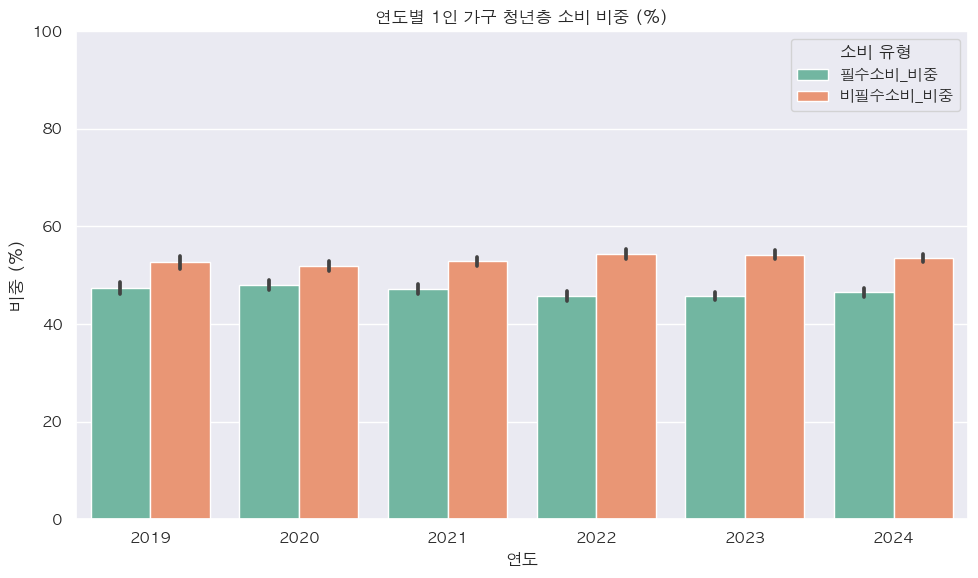

In [224]:
# 누적 막대그래프
plt.figure(figsize=(10, 6))
sns.barplot(data=data2_melted, x='조사연도', y='비중', hue='소비유형', palette='Set2')
plt.title('연도별 1인 가구 청년층 소비 비중 (%)')
plt.ylabel('비중 (%)')
plt.xlabel('연도')
plt.ylim(0, 100)
plt.legend(title='소비 유형')
plt.tight_layout()
plt.show()

### 1) 연령그룹별 필수/비필수항목 지출 분석(평균)

In [91]:
# 연령그룹과 조사연도 기준으로 그룹화하여 평균 계산
age_grouped = data2.groupby(['연령그룹', '조사연도'])[['필수소비_총액', '비필수소비_총액']].mean().reset_index()

In [92]:
print(age_grouped)

      연령그룹  조사연도       필수소비_총액      비필수소비_총액
0   30대 초반  2019  8.240934e+05  1.031725e+06
1   30대 초반  2020  9.696954e+05  9.589748e+05
2   30대 초반  2021  8.092081e+05  9.554464e+05
3   30대 초반  2022  8.702266e+05  1.024985e+06
4   30대 초반  2023  8.642093e+05  1.091985e+06
5   30대 초반  2024  1.010193e+06  1.167004e+06
6      대학생  2019  6.539755e+05  7.445130e+05
7      대학생  2020  6.902767e+05  7.478440e+05
8      대학생  2021  6.999060e+05  7.731821e+05
9      대학생  2022  7.660818e+05  8.234050e+05
10     대학생  2023  7.375528e+05  9.005011e+05
11     대학생  2024  7.936316e+05  8.606054e+05
12   사회초년생  2019  9.455814e+05  9.264262e+05
13   사회초년생  2020  8.018816e+05  8.744716e+05
14   사회초년생  2021  7.227317e+05  8.532732e+05
15   사회초년생  2022  7.829216e+05  9.247641e+05
16   사회초년생  2023  8.453074e+05  1.049272e+06
17   사회초년생  2024  9.169908e+05  1.107645e+06


In [93]:
# 소수점 없이 정수형 형식으로 출력 설정
pd.options.display.float_format = '{:,.0f}'.format

# 다시 결과 출력
print(age_grouped)

      연령그룹  조사연도   필수소비_총액  비필수소비_총액
0   30대 초반  2019   824,093 1,031,725
1   30대 초반  2020   969,695   958,975
2   30대 초반  2021   809,208   955,446
3   30대 초반  2022   870,227 1,024,985
4   30대 초반  2023   864,209 1,091,985
5   30대 초반  2024 1,010,193 1,167,004
6      대학생  2019   653,976   744,513
7      대학생  2020   690,277   747,844
8      대학생  2021   699,906   773,182
9      대학생  2022   766,082   823,405
10     대학생  2023   737,553   900,501
11     대학생  2024   793,632   860,605
12   사회초년생  2019   945,581   926,426
13   사회초년생  2020   801,882   874,472
14   사회초년생  2021   722,732   853,273
15   사회초년생  2022   782,922   924,764
16   사회초년생  2023   845,307 1,049,272
17   사회초년생  2024   916,991 1,107,645


In [36]:
from matplotlib.ticker import FuncFormatter

def 원화_포맷(x, pos):
    return f'{int(x):,}원'

plt.figure(figsize=(14, 6))

# 필수소비_총액 그래프
sns.lineplot(data=age_grouped, x='조사연도', y='필수소비_총액', hue='연령그룹', marker='o')
plt.title('연령그룹별 필수소비_총액 평균 변화')
plt.ylabel('평균 필수 소비 금액 (원)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

# 2020~2021년도에 소비가 감소하는 패턴을 보이다가 이후 다시 회복되는 양상을 보임 
# 2020년에 30대초반 그룹이 어느항목에 소비가 늘었는지 확인해보기 

NameError: name 'age_grouped' is not defined

<Figure size 1400x600 with 0 Axes>

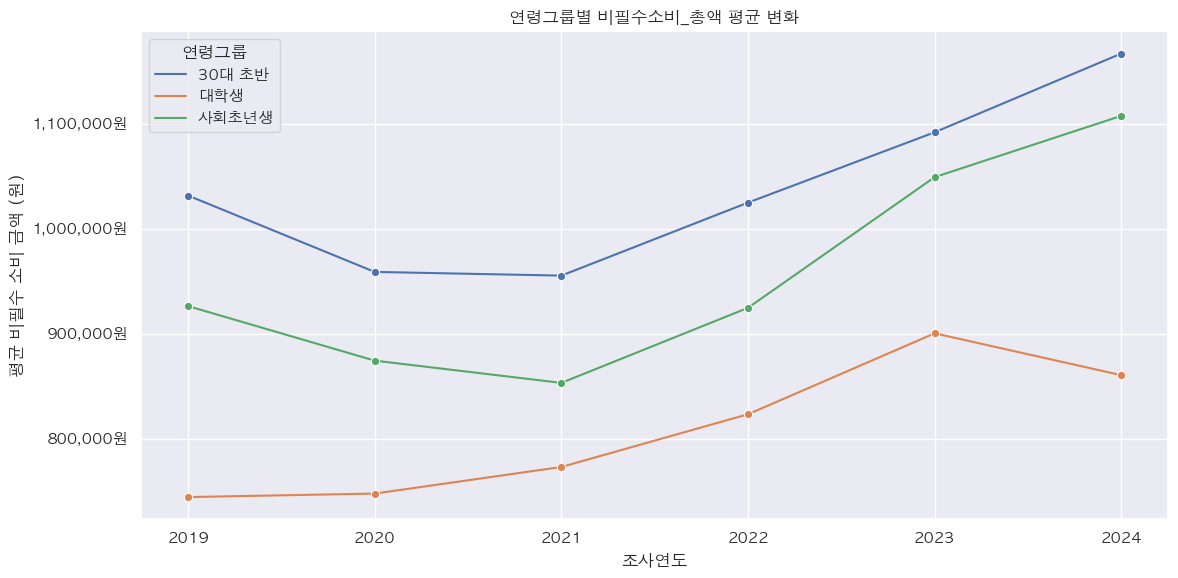

In [116]:
# 비필수소비_총액 그래프
sns.lineplot(data=age_grouped, x='조사연도', y='비필수소비_총액', hue='연령그룹', marker='o')
plt.title('연령그룹별 비필수소비_총액 평균 변화')
plt.ylabel('평균 비필수 소비 금액 (원)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

# 마찬가지로 2020~2021년 시기에는 소비 평균이 감소하는 추세를 보이다가 2021년 이후로 상승하는 양상
# 대학생그룹을 제외하곤 2024년도까지도 쭉 상승하는 추세를 보임 

### 1-2) 연령그룹별 필수/비필수항목 지출 분석(중앙값)

In [198]:
# 연령그룹과 조사연도 기준으로 그룹화하여 중앙값 계산
age_grouped_median = data2.groupby(['조사연도', '연령그룹'])[['필수소비_총액', '비필수소비_총액']].median().reset_index()
print(age_grouped_median)

    조사연도    연령그룹  필수소비_총액  비필수소비_총액
0   2019  30대 초반  710,712   852,584
1   2019     대학생  634,115   692,956
2   2019   사회초년생  683,084   797,115
3   2020  30대 초반  744,038   794,577
4   2020     대학생  692,428   644,365
5   2020   사회초년생  661,487   730,547
6   2021  30대 초반  712,430   820,985
7   2021     대학생  638,350   735,444
8   2021   사회초년생  669,489   726,476
9   2022  30대 초반  780,580   881,834
10  2022     대학생  628,892   734,325
11  2022   사회초년생  684,185   835,474
12  2023  30대 초반  799,082   912,351
13  2023     대학생  690,710   789,930
14  2023   사회초년생  744,146   936,458
15  2024  30대 초반  820,276   960,124
16  2024     대학생  723,509   773,379
17  2024   사회초년생  812,424   971,490


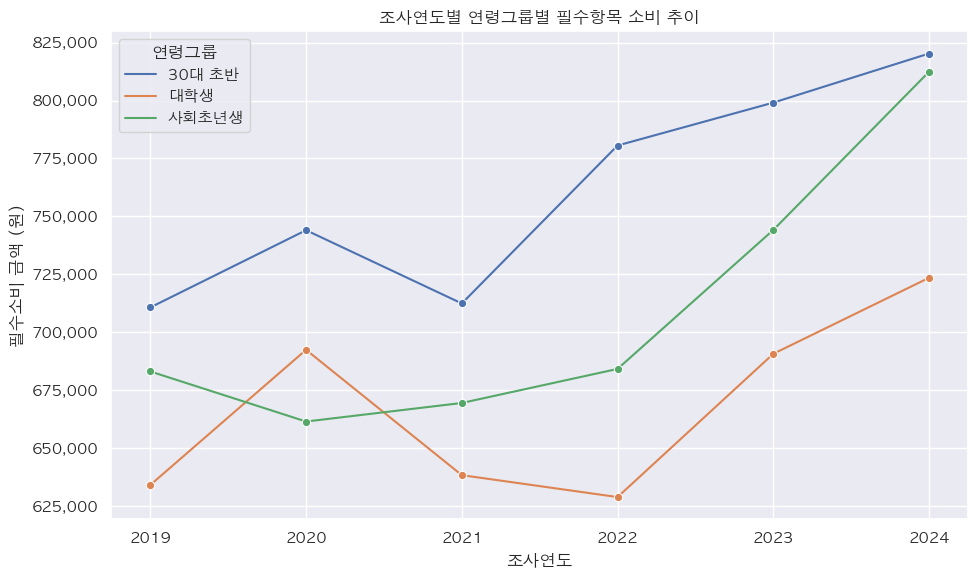

In [200]:
def 원화_포맷(x, pos):
    return f'{int(x):,}'

plt.figure(figsize=(10, 6))

# 1. 필수소비_총액 추이
sns.lineplot(data=age_grouped_median, x='조사연도', y='필수소비_총액', hue='연령그룹', marker='o')
plt.title('조사연도별 연령그룹별 필수항목 소비 추이')
plt.ylabel('필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

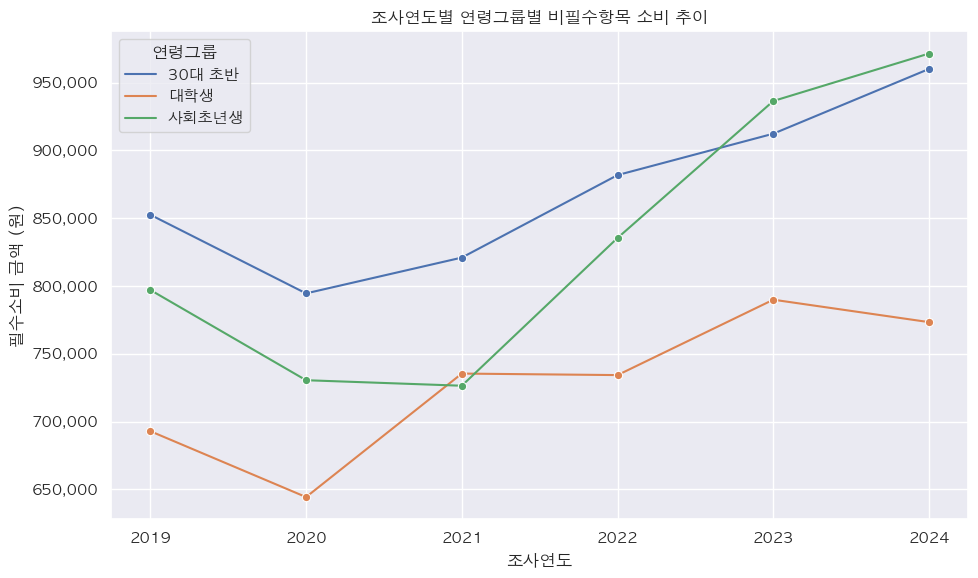

In [201]:
def 원화_포맷(x, pos):
    return f'{int(x):,}'

plt.figure(figsize=(10, 6))

# 2. 비필수소비_총액 추이
sns.lineplot(data=age_grouped_median, x='조사연도', y='비필수소비_총액', hue='연령그룹', marker='o')
plt.title('조사연도별 연령그룹별 비필수항목 소비 추이')
plt.ylabel('필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

### 2) 직업군별 필수/비필수항목 지출 분석(평균)

In [117]:
# 연령그룹과 조사연도 기준으로 그룹화하여 평균 계산
job_grouped = data2.groupby(['조사연도', '직업군'])[['필수소비_총액', '비필수소비_총액']].mean().reset_index()
print(job_grouped)

    조사연도     직업군   필수소비_총액  비필수소비_총액
0   2019     사무직   937,858   980,035
1   2019  서비스/판매   702,457   873,367
2   2019   육체노동자   850,962   765,737
3   2019     전문가   862,878   983,616
4   2020     사무직   856,694   917,488
5   2020  서비스/판매   771,863   817,747
6   2020   육체노동자   762,759   849,352
7   2020     전문가   915,066   907,733
8   2021     사무직   817,026   969,024
9   2021  서비스/판매   721,049   828,301
10  2021   육체노동자   706,871   778,982
11  2021     전문가   745,415   889,863
12  2022     사무직   785,250   994,618
13  2022  서비스/판매   940,997   838,969
14  2022   육체노동자   739,555   892,620
15  2022     전문가   794,814   995,082
16  2023     사무직   840,559 1,050,553
17  2023  서비스/판매   734,884   966,574
18  2023   육체노동자   894,107 1,018,962
19  2023     전문가   852,426 1,080,695
20  2024     사무직   880,749 1,181,779
21  2024  서비스/판매   853,478   898,786
22  2024   육체노동자 1,115,376 1,025,192
23  2024     전문가   940,245 1,148,289


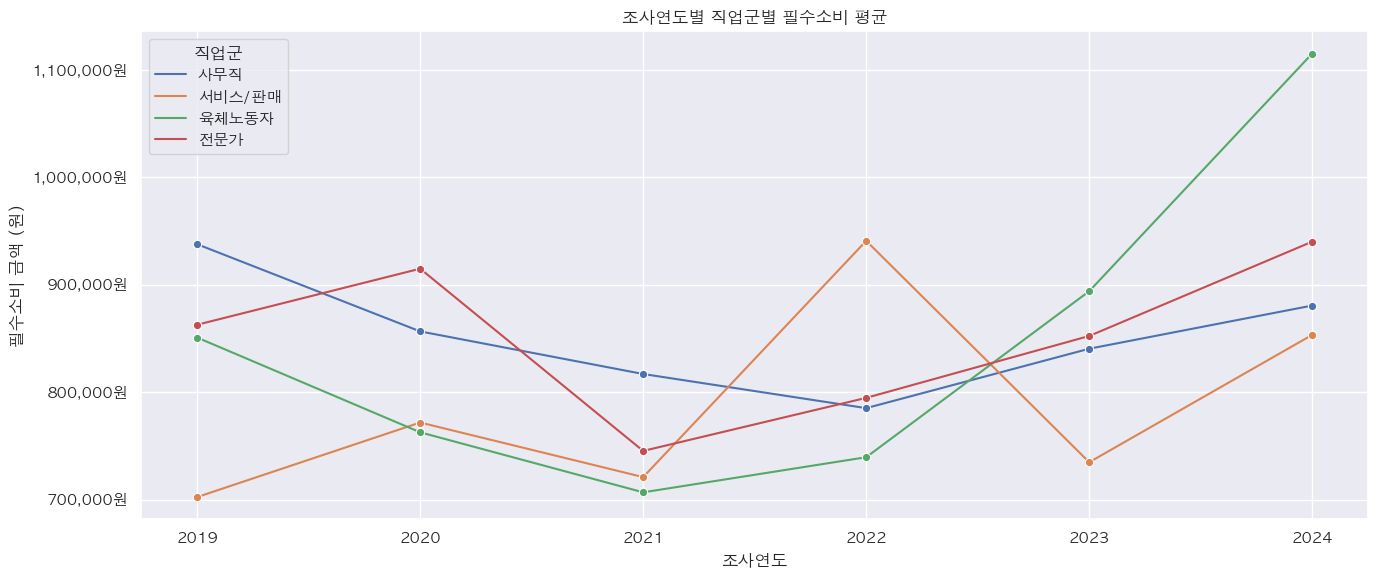

In [127]:
def 원화_포맷(x, pos):
    return f'{int(x):,}원'

plt.figure(figsize=(14, 6))

# 1. 필수소비_총액 추이
sns.lineplot(data=job_grouped, x='조사연도', y='필수소비_총액', hue='직업군', marker='o')
plt.title('조사연도별 직업군별 필수소비 평균')
plt.ylabel('필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

#육체노동자는 어떠한 필수소비 항목에 많은 지출을 하는지 파악하고 분석해보기 (특히 2024)
# 서비스/판매직은 필수소비 항목도 보기(특히 2022)
# 필수소비항목에서는 직업군에 큰 영향을 받지 않는 것으로 보임 육체노동자들은 필수소비항목에 소비를 많이할 수 밖에 없어서, 
# 혹은 예전과 똑같은 식사를 하더라도 물가의 영향때문인지 확인해보기

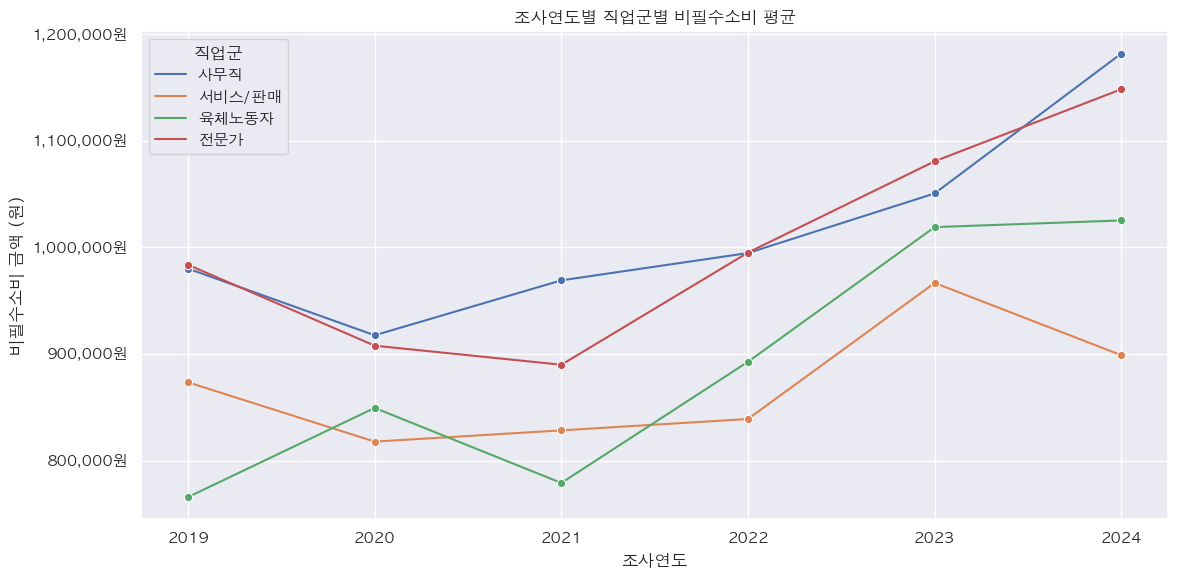

In [186]:
def 원화_포맷(x, pos):
    return f'{int(x):,}원'

plt.figure(figsize=(12, 6))

# 2. 비필수소비_총액 추이
sns.lineplot(data=job_grouped, x='조사연도', y='비필수소비_총액', hue='직업군', marker='o')
plt.title('조사연도별 직업군별 비필수소비 평균')
plt.ylabel('비필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

# 전문가와 사무직 사이에는 큰 차이가 보이지않음
# 비필수소비항목에선 대체로 전문가/사무직 -> 서비스,판매/육체노동자 순으로 소비가 많음

### 2-2) 직업군별 필수/비필수항목 지출 분석(중앙값)

In [183]:
# 직업군과 조사연도 기준으로 그룹화하여 중앙값 계산
job_grouped_median = data2.groupby(['조사연도', '직업군'])[['필수소비_총액', '비필수소비_총액']].median().reset_index()
print(job_grouped_median)

    조사연도     직업군  필수소비_총액  비필수소비_총액
0   2019     사무직  685,996   851,435
1   2019  서비스/판매  642,971   747,042
2   2019   육체노동자  638,384   659,281
3   2019     전문가  687,918   866,824
4   2020     사무직  725,364   823,509
5   2020  서비스/판매  698,640   700,704
6   2020   육체노동자  657,066   667,364
7   2020     전문가  697,971   729,800
8   2021     사무직  679,376   784,924
9   2021  서비스/판매  703,436   736,563
10  2021   육체노동자  662,950   667,220
11  2021     전문가  696,571   773,544
12  2022     사무직  681,324   888,036
13  2022  서비스/판매  688,788   773,550
14  2022   육체노동자  676,947   728,966
15  2022     전문가  734,058   912,132
16  2023     사무직  783,852   939,805
17  2023  서비스/판매  685,158   795,893
18  2023   육체노동자  751,727   914,006
19  2023     전문가  748,742   925,824
20  2024     사무직  794,761   996,623
21  2024  서비스/판매  747,809   757,060
22  2024   육체노동자  881,297   837,135
23  2024     전문가  813,440 1,001,751


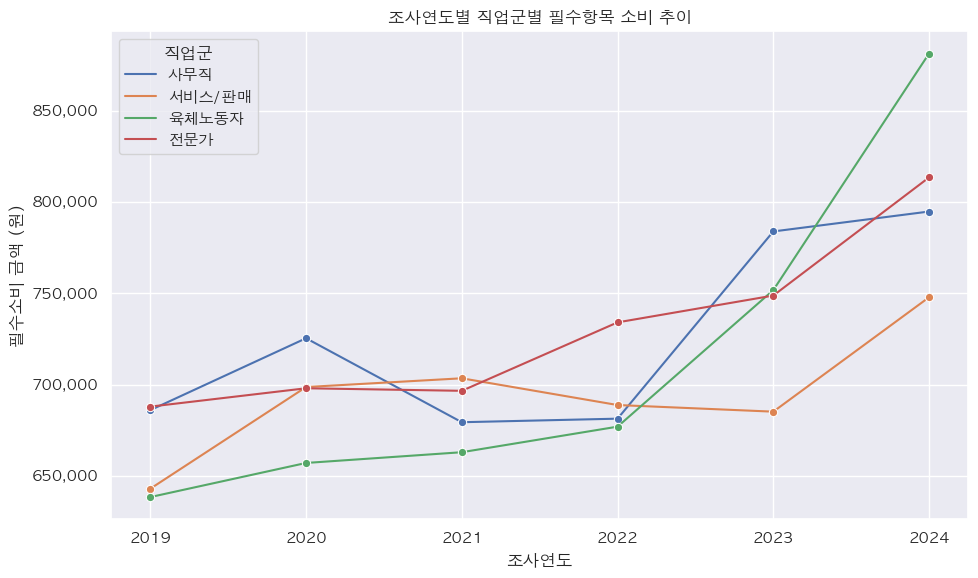

In [202]:
def 원화_포맷(x, pos):
    return f'{int(x):,}'

plt.figure(figsize=(10, 6))

# 1. 필수소비_총액 추이
sns.lineplot(data=job_grouped_median, x='조사연도', y='필수소비_총액', hue='직업군', marker='o')
plt.title('조사연도별 직업군별 필수항목 소비 추이')
plt.ylabel('필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

#육체노동자는 어떠한 필수소비 항목에 많은 지출을 하는지 파악하고 분석해보기 (특히 2024)
# 서비스/판매직은 필수소비 항목도 보기(특히 2022)
# 필수소비항목에서는 직업군에 큰 영향을 받지 않는 것으로 보임 육체노동자들은 필수소비항목에 소비를 많이할 수 밖에 없어서, 
# 혹은 예전과 똑같은 식사를 하더라도 물가의 영향때문인지 확인해보기

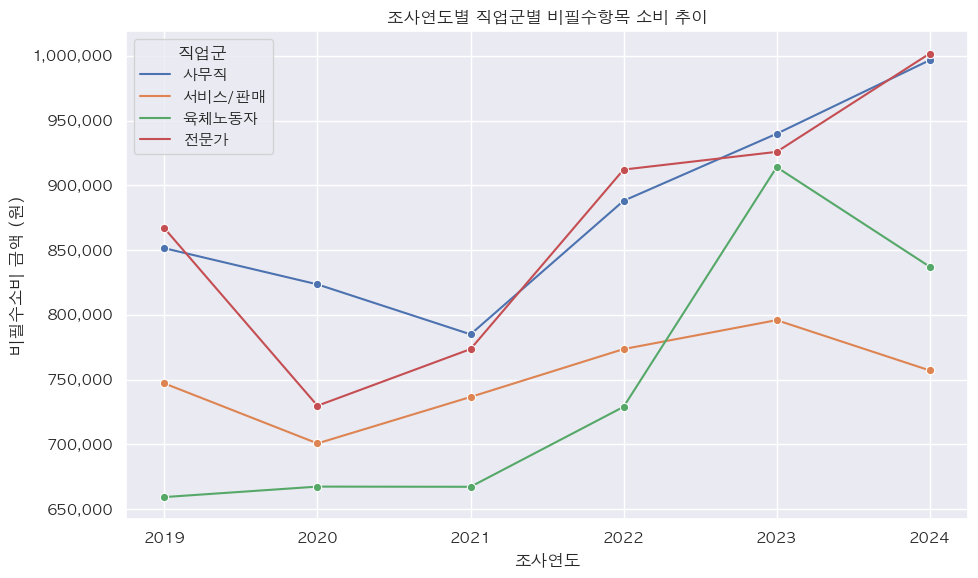

In [203]:
def 원화_포맷(x, pos):
    return f'{int(x):,}'

plt.figure(figsize=(10, 6))

# 2. 비필수소비_총액 추이
sns.lineplot(data=job_grouped_median, x='조사연도', y='비필수소비_총액', hue='직업군', marker='o')
plt.title('조사연도별 직업군별 비필수항목 소비 추이')
plt.ylabel('비필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

### 3) 소득군별 필수/비필수항목 지출 분석(평균)

In [128]:
# 연령그룹과 조사연도 기준으로 그룹화하여 평균 계산
income_grouped = data2.groupby(['조사연도', '소득군'])[['필수소비_총액', '비필수소비_총액']].mean().reset_index()
print(income_grouped)

    조사연도           소득군   필수소비_총액  비필수소비_총액
0   2019  200-300만원 미만   730,873   855,464
1   2019  300-400만원 미만   949,312 1,048,851
2   2019      400만원 이상 1,385,256 1,370,285
3   2019       최저시급 이하   607,505   654,412
4   2020  200-300만원 미만   793,816   786,837
5   2020  300-400만원 미만   776,492 1,022,118
6   2020      400만원 이상 1,321,725 1,183,620
7   2020       최저시급 이하   616,202   660,272
8   2021  200-300만원 미만   719,721   784,294
9   2021  300-400만원 미만   743,230   972,114
10  2021      400만원 이상   962,443 1,175,300
11  2021       최저시급 이하   634,986   681,357
12  2022  200-300만원 미만   706,175   823,405
13  2022  300-400만원 미만   891,908   981,651
14  2022      400만원 이상 1,080,059 1,321,662
15  2022       최저시급 이하   573,901   670,033
16  2023  200-300만원 미만   772,990   867,554
17  2023  300-400만원 미만   895,896 1,006,586
18  2023      400만원 이상   924,910 1,418,594
19  2023       최저시급 이하   691,334   763,527
20  2024  200-300만원 미만   781,684   878,121
21  2024  300-400만원 미만   965,018 1,048,859
22  2024   

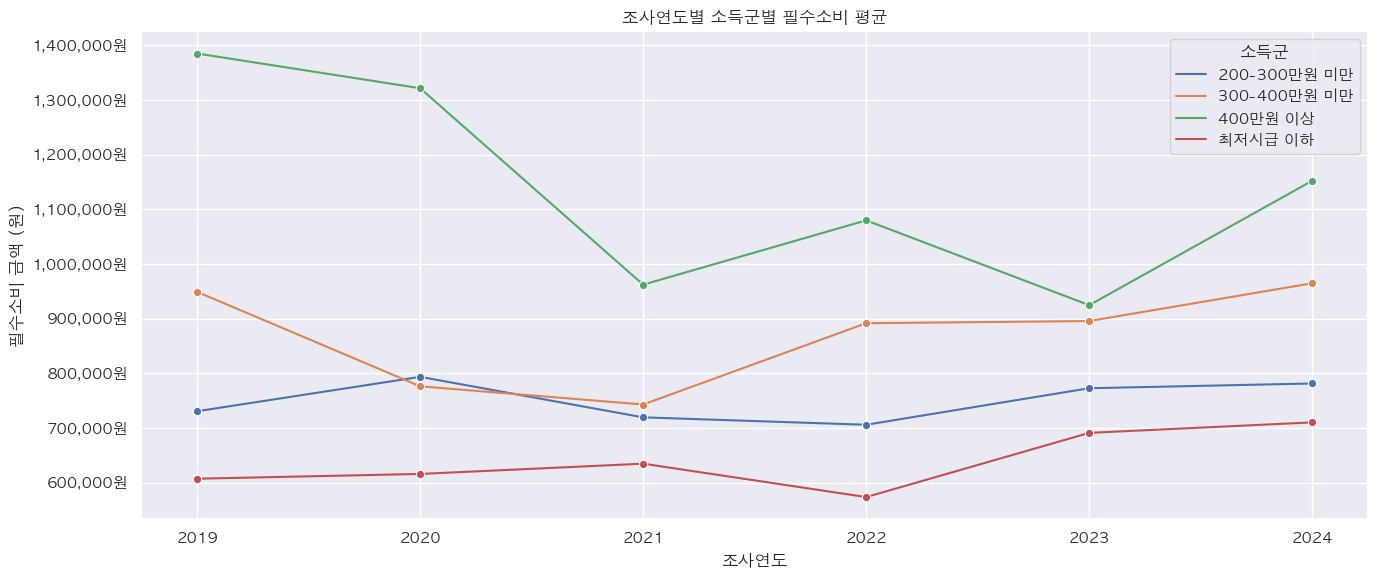

In [130]:
def 원화_포맷(x, pos):
    return f'{int(x):,}원'

plt.figure(figsize=(14, 6))

# 1. 필수소비_총액 추이
sns.lineplot(data=income_grouped, x='조사연도', y='필수소비_총액', hue='소득군', marker='o')
plt.title('조사연도별 소득군별 필수소비 평균')
plt.ylabel('필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

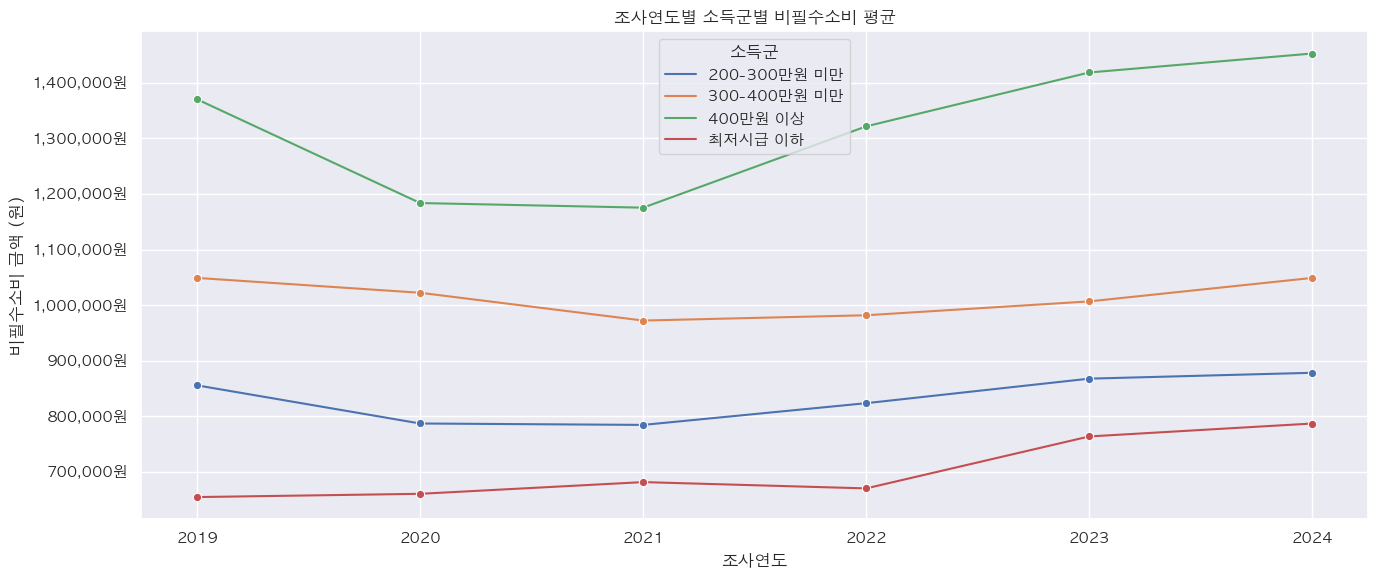

In [131]:
def 원화_포맷(x, pos):
    return f'{int(x):,}원'

plt.figure(figsize=(14, 6))

# 2. 비필수소비_총액 추이
sns.lineplot(data=income_grouped, x='조사연도', y='비필수소비_총액', hue='소득군', marker='o')
plt.title('조사연도별 소득군별 비필수소비 평균')
plt.ylabel('비필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

### 3-2) 소득군별 필수/비필수항목 지출 분석(중앙값)

In [196]:
# 소득군과 조사연도 기준으로 그룹화하여 중앙값 계산
income_grouped_median = data2.groupby(['조사연도', '소득군'])[['필수소비_총액', '비필수소비_총액']].median().reset_index()
print(income_grouped_median)

    조사연도           소득군  필수소비_총액  비필수소비_총액
0   2019  200-300만원 미만  660,827   756,179
1   2019  300-400만원 미만  728,740   961,146
2   2019      400만원 이상  902,836 1,223,872
3   2019       최저시급 이하  584,289   582,881
4   2020  200-300만원 미만  707,275   697,195
5   2020  300-400만원 미만  698,329   878,157
6   2020      400만원 이상  885,404   975,296
7   2020       최저시급 이하  629,859   579,126
8   2021  200-300만원 미만  673,446   735,647
9   2021  300-400만원 미만  676,858   902,739
10  2021      400만원 이상  825,098   938,999
11  2021       최저시급 이하  632,271   560,961
12  2022  200-300만원 미만  675,570   778,035
13  2022  300-400만원 미만  745,423   908,116
14  2022      400만원 이상  808,337 1,198,724
15  2022       최저시급 이하  531,524   641,975
16  2023  200-300만원 미만  708,230   791,174
17  2023  300-400만원 미만  794,801   957,212
18  2023      400만원 이상  850,175 1,159,212
19  2023       최저시급 이하  629,007   644,108
20  2024  200-300만원 미만  750,164   806,252
21  2024  300-400만원 미만  848,029   920,489
22  2024      400만원 이상  932,235 1,

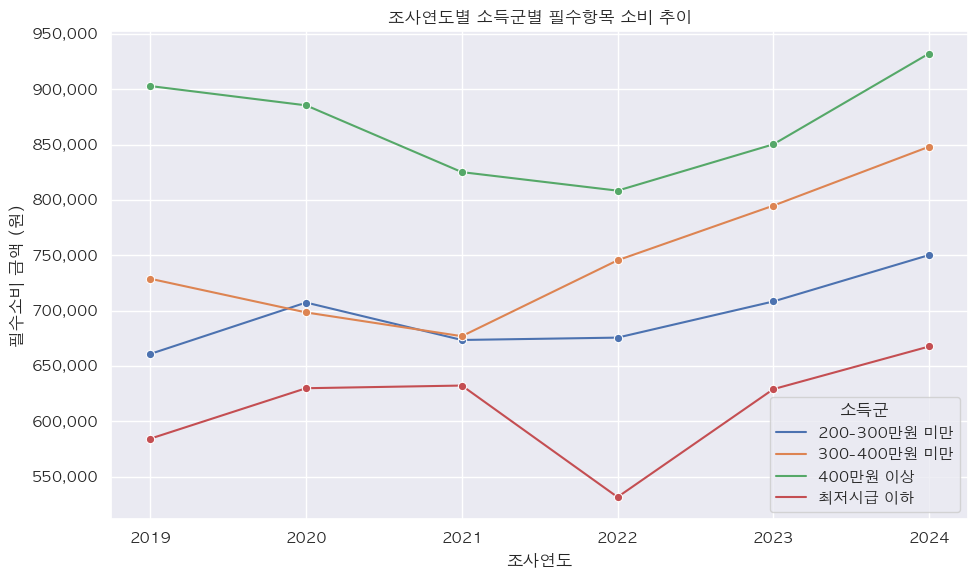

In [204]:
def 원화_포맷(x, pos):
    return f'{int(x):,}'

plt.figure(figsize=(10, 6))

# 1. 필수소비_총액 추이
sns.lineplot(data=income_grouped_median, x='조사연도', y='필수소비_총액', hue='소득군', marker='o')
plt.title('조사연도별 소득군별 필수항목 소비 추이')
plt.ylabel('필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

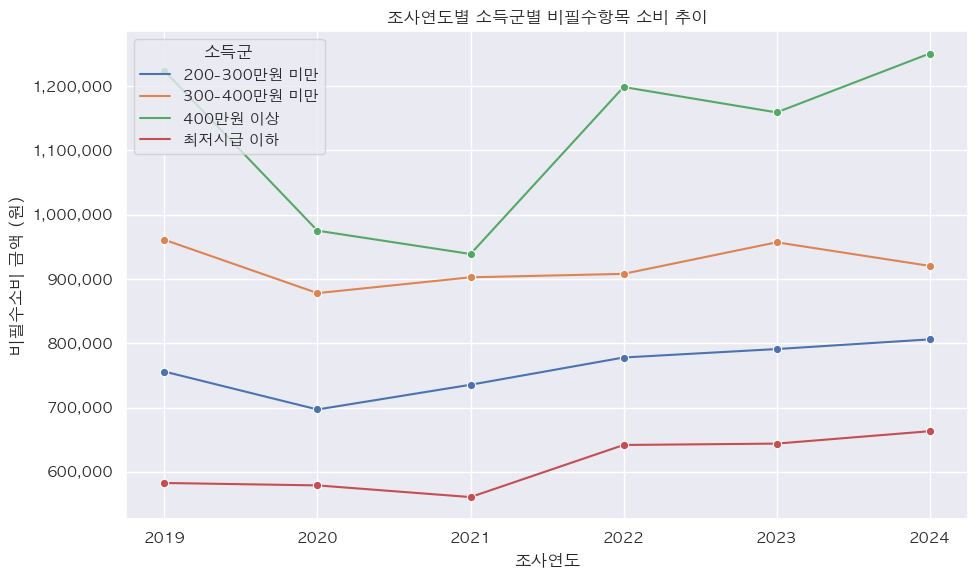

In [205]:
def 원화_포맷(x, pos):
    return f'{int(x):,}'

plt.figure(figsize=(10, 6))

# 2. 비필수소비_총액 추이
sns.lineplot(data=income_grouped_median, x='조사연도', y='비필수소비_총액', hue='소득군', marker='o')
plt.title('조사연도별 소득군별 비필수항목 소비 추이')
plt.ylabel('비필수소비 금액 (원)')
plt.xlabel('조사연도')
plt.gca().yaxis.set_major_formatter(FuncFormatter(원화_포맷))

plt.tight_layout()
plt.show()

In [132]:
data2.describe()

,가구구분코드,가구원수,연령,취엽어부,가계지출금액,가계지출_소비지출금액,식료품비주류음료구입비,주거수도광열비,보건제품구입비,교통비,...,가정용품가사서비스이용금액,오락문화비,교육비,음식숙박비,기타상품서비스이용금액,조사연도,필수소비_총액,비필수소비_총액,필수소비_비중,비필수소비_비중
count,"4,491","4,491","4,491","4,491","4,491","4,491","4,491","4,491","4,491","4,491",...,"4,491","4,491","4,491","4,491","4,491","4,491","4,491","4,491","4,491","4,491"
mean,1,1,28,1,"2,365,517","1,812,063","126,227","315,393","81,272","234,505",...,"71,663","164,635","44,618","407,185","131,441","2,022","840,074","971,989",0,1
std,0,0,4,0,"1,517,895","1,284,077","81,991","224,923","152,104","924,720",...,"317,246","240,275","157,014","221,713","182,511",2,"997,975","688,100",0,0
min,1,1,19,1,"334,746","308,772",0,0,0,0,...,0,0,0,0,0,"2,019","65,898","89,682",0,0
25%,1,1,26,1,"1,582,676","1,226,969","69,220","125,360","11,500","76,578",...,"6,929","41,850",0,"260,264","47,878","2,020","539,063","586,656",0,0
50%,1,1,28,1,"2,095,097","1,599,912","110,375","303,935","37,205","130,730",...,"20,555","92,963",0,"367,857","89,314","2,022","722,214","833,476",0,1
75%,1,1,31,1,"2,778,170","2,079,963","165,508","447,446","90,838","217,800",...,"52,017","193,025",0,"513,471","155,344","2,023","953,541","1,171,668",1,1
max,2,1,34,1,"41,744,071","39,538,904","770,125","2,685,152","2,900,000","37,269,100",...,"7,781,435","4,514,508","2,069,000","2,484,830","3,650,662","2,024","38,841,282","17,005,069",1,1
